# 📊 **Students Social Media Addiction - Exploratory Data Analysis**
---

### ✍️ **Introduction**
Welcome to an in-depth exploration of the **Students Social Media Addiction** dataset! 📚

In this notebook, we dive into the patterns of student behavior regarding social media usage. Through insightful visualizations and statistical techniques, we aim to uncover:

- 🌐 Popular platforms among students
- ⏱️ Average daily usage & sleep patterns
- 📉 Effects on academics and mental health
- 🧠 Clustering of behavioral profiles


### 🧰 **Libraries & Setup**

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import spearmanr

### 📥 **Load Dataset**

In [218]:
df = pd.read_csv("/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [219]:
# Dataset information
print("\nDataset information:")
df.info()

# Summary statistics
print("\nSummary statistics of numerical variables:")
df.describe()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


### Data Pre-processing and Feature Engineering

In [220]:
# Convert categorical variables to appropriate data types if needed
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Gender:
Gender
Female    353
Male      352
Name: count, dtype: int64

Unique values in Academic_Level:
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

Unique values in Country:
Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64

Unique values in Most_Used_Platform:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64

Unique values in Affects_Academic_Performance:
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

Unique values in Relationship_Status:
Relationship_Status
Single             384
In Relationship    289
Complica

### Create additional features for analysis

In [221]:
# Create age groups
bins = [15, 20, 25, 30, 35]
labels = ['16-20', '21-25', '26-30', '31-35']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [222]:
# Categorize social media usage hours
usage_bins = [0, 2, 4, 6, 12, 24]
usage_labels = ['Minimal (0-2h)', 'Moderate (2-4h)', 'High (4-6h)', 'Very High (6-12h)', 'Extreme (12h+)']
df['Usage_Category'] = pd.cut(df['Avg_Daily_Usage_Hours'], bins=usage_bins, labels=usage_labels)

In [223]:
# Categorize sleep hours
sleep_bins = [0, 5, 7, 9, 12]
sleep_labels = ['Poor (<5h)', 'Fair (5-7h)', 'Good (7-9h)', 'Excellent (9h+)']
df['Sleep_Category'] = pd.cut(df['Sleep_Hours_Per_Night'], bins=sleep_bins, labels=sleep_labels)

## 👥 **Demographic Analysis**

### 1️⃣ **Student Demographics**

In [224]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

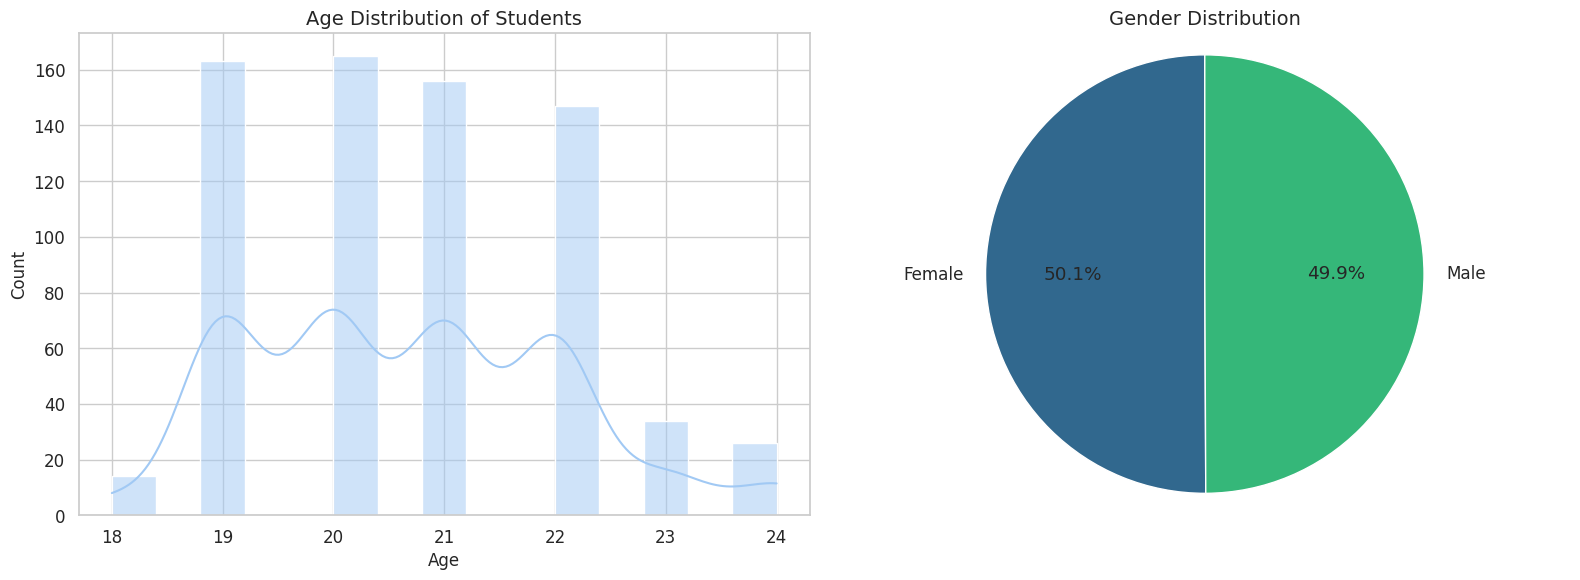

In [225]:
# #### Age and Gender Distribution
plt.figure(figsize=(16, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution of Students', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Gender distribution
plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts)))
plt.title('Gender Distribution', fontsize=14)
plt.axis('equal')

plt.tight_layout()
plt.show()

### 2️⃣ **Country-wise Distribution**

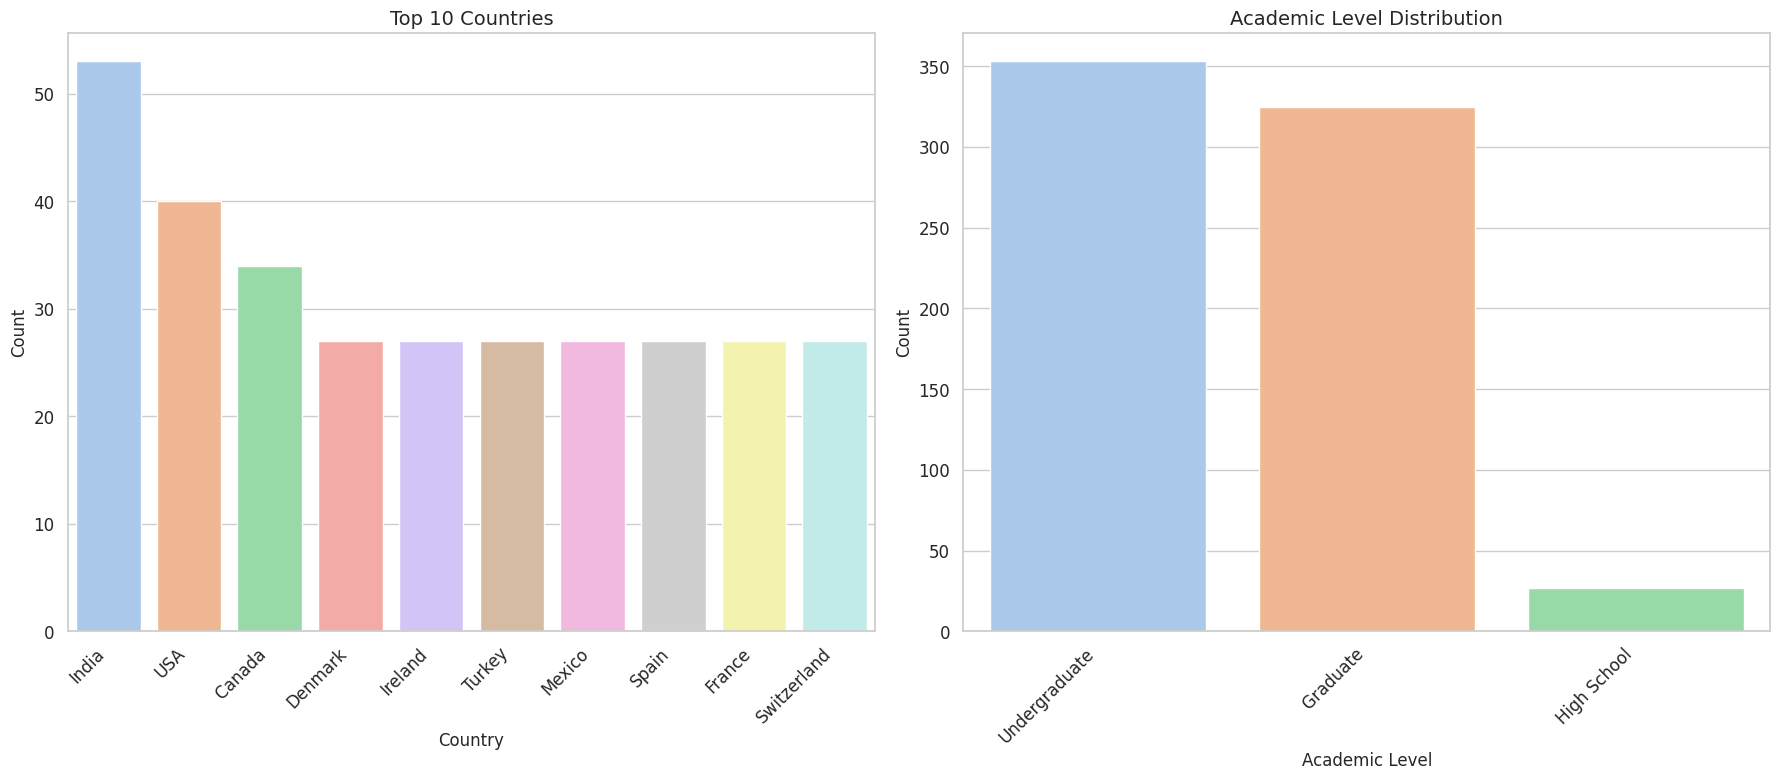

In [226]:
plt.figure(figsize=(18, 8))

# Country distribution
plt.subplot(1, 2, 1)
country_counts = df['Country'].value_counts().head(10)  # Top 10 countries
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Academic level distribution
plt.subplot(1, 2, 2)
academic_counts = df['Academic_Level'].value_counts()
sns.barplot(x=academic_counts.index, y=academic_counts.values)
plt.title('Academic Level Distribution', fontsize=14)
plt.xlabel('Academic Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### 3️⃣ **Academic Level Distribution**

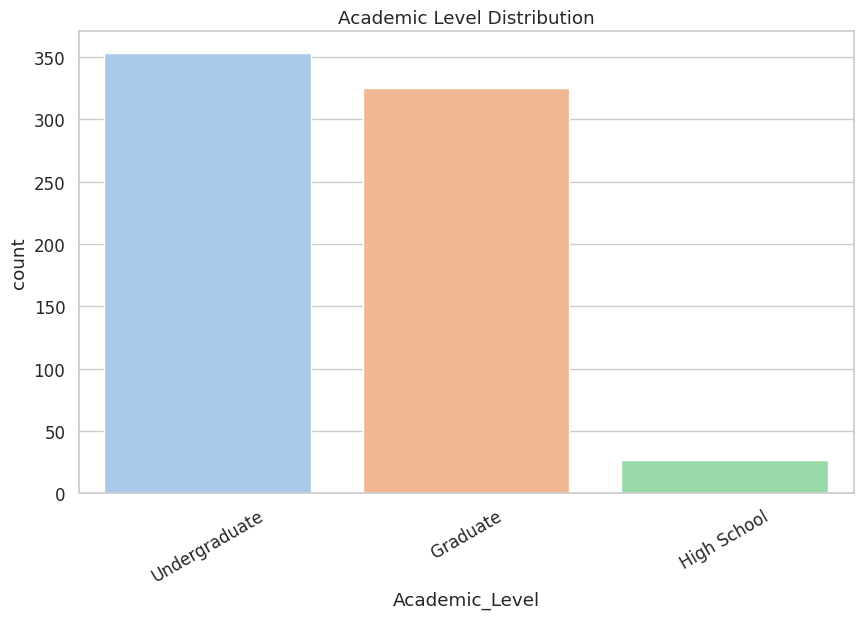

In [227]:
sns.countplot(data=df, x="Academic_Level", order=df['Academic_Level'].value_counts().index)
plt.title("Academic Level Distribution")
plt.xticks(rotation=30)
plt.show()

## 📱 **Platform Usage Patterns**
### 4️⃣ **Most Used Social Media Platform**

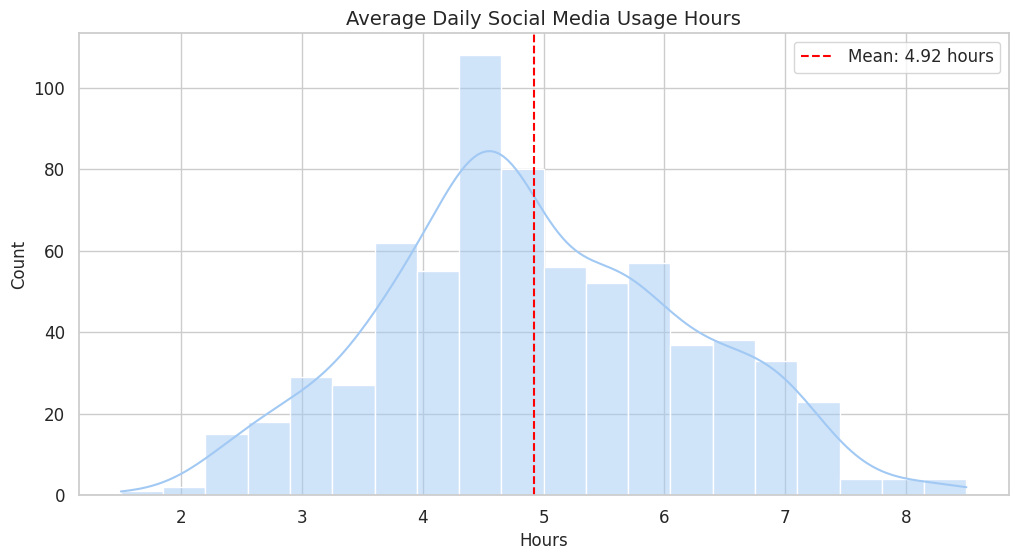

In [228]:
# #### Average Daily Usage Hours
plt.figure(figsize=(12, 6))
sns.histplot(df['Avg_Daily_Usage_Hours'], kde=True, bins=20)
plt.title('Average Daily Social Media Usage Hours', fontsize=14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.axvline(df['Avg_Daily_Usage_Hours'].mean(), color='red', linestyle='--', label=f'Mean: {df["Avg_Daily_Usage_Hours"].mean():.2f} hours')
plt.legend()
plt.show()

### 5️⃣ **Interactive Platform Chart**

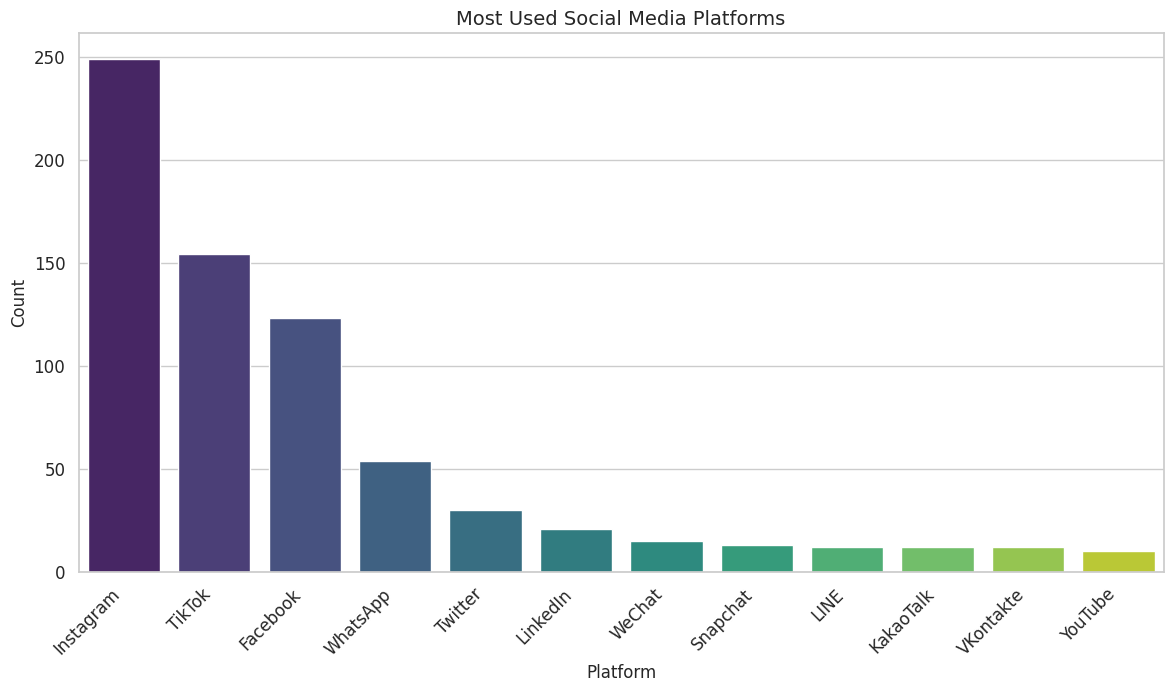

In [229]:
plt.figure(figsize=(14, 7))
platform_counts = df['Most_Used_Platform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.title('Most Used Social Media Platforms', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

## ⏱️ **Usage & Sleep Behavior**

### 7️⃣ **Daily Usage by Gender**

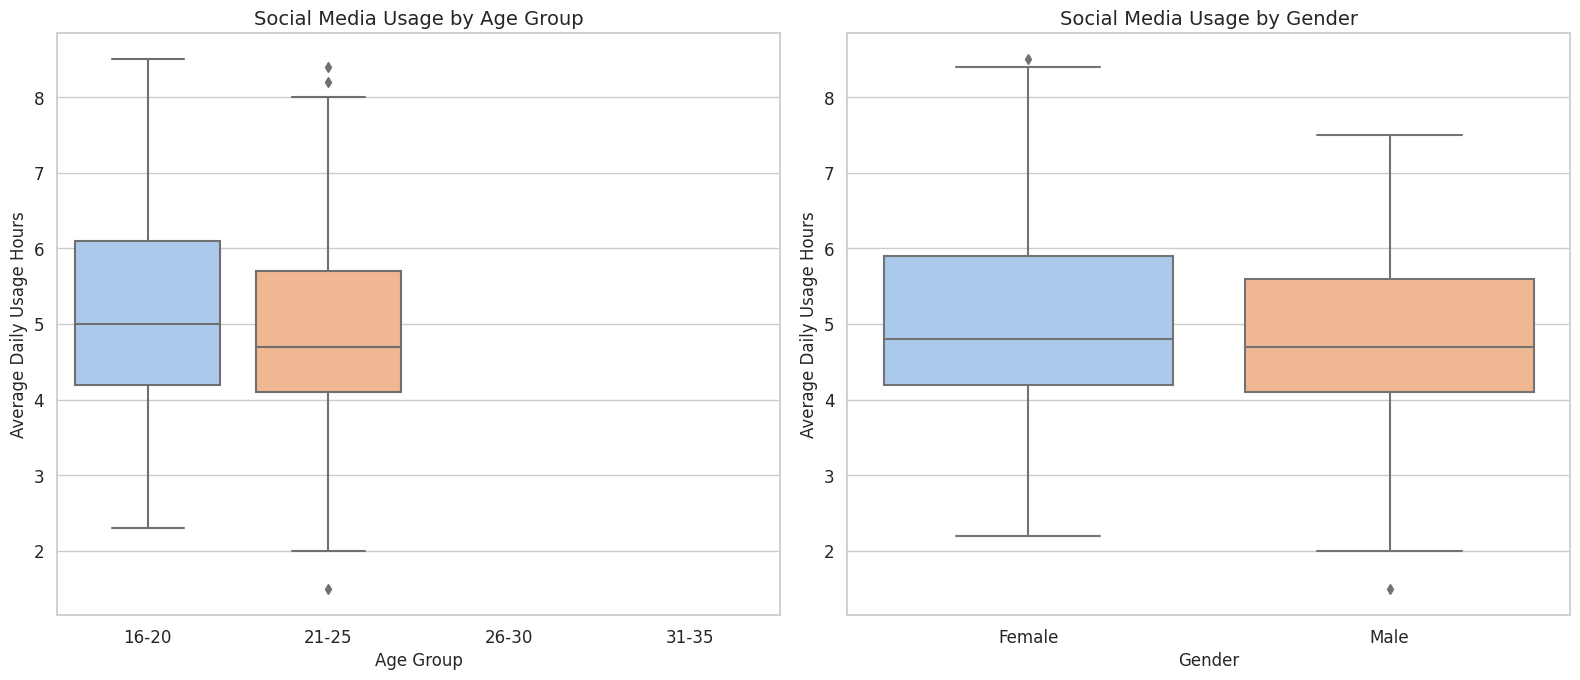

In [230]:
# #### Social Media Usage by Age Group and Gender
plt.figure(figsize=(16, 7))

# Usage by age group
plt.subplot(1, 2, 1)
sns.boxplot(x='Age_Group', y='Avg_Daily_Usage_Hours', data=df)
plt.title('Social Media Usage by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Daily Usage Hours', fontsize=12)

# Usage by gender
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Avg_Daily_Usage_Hours', data=df)
plt.title('Social Media Usage by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Daily Usage Hours', fontsize=12)

plt.tight_layout()
plt.show()

### 8️⃣ **Sleep vs Usage Scatterplot**

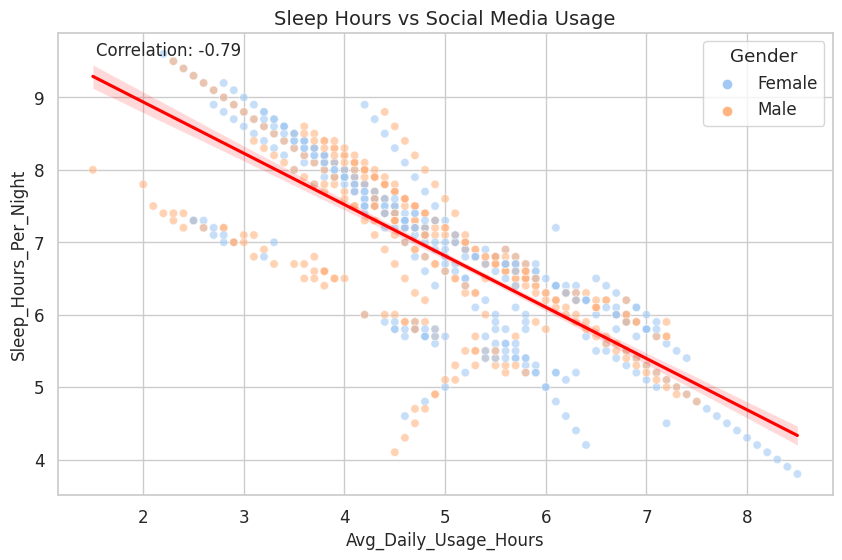

In [231]:
# #### Sleep Hours vs Social Media Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, alpha=0.6, hue='Gender')
plt.title('Sleep Hours vs Social Media Usage', fontsize=14)
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Sleep Hours Per Night', fontsize=12)

# Add regression line
sns.regplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, scatter=False, color='red')

# Calculate correlation
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

## 🧠 **Academic & Mental Health Impact**
### 9️⃣ **Academic Impact Performance**

<Figure size 1400x700 with 0 Axes>

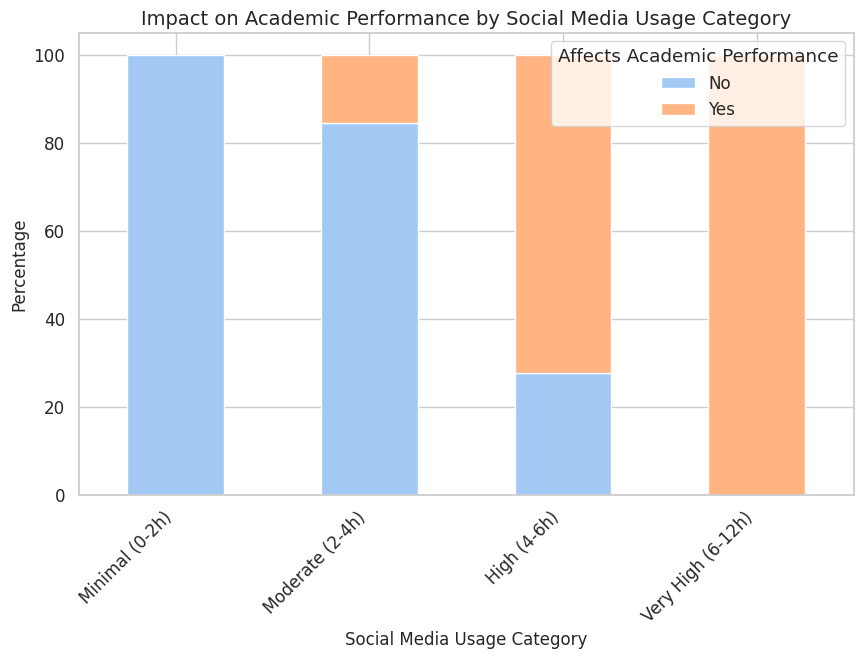

In [232]:
# #### Usage Category vs Academic Performance
# Cross-tabulation of usage category and academic impact
academic_impact_by_usage = pd.crosstab(df['Usage_Category'], df['Affects_Academic_Performance'])
academic_impact_by_usage_percentage = academic_impact_by_usage.div(academic_impact_by_usage.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))
academic_impact_by_usage_percentage.plot(kind='bar', stacked=True)
plt.title('Impact on Academic Performance by Social Media Usage Category', fontsize=14)
plt.xlabel('Social Media Usage Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Affects Academic Performance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [233]:
# #### Academic Performance vs Social Media Usage
fig = px.box(df, x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', 
              title='Social Media Usage Hours vs. Impact on Academic Performance',
              labels={'Affects_Academic_Performance': 'Does it Affect Academic Performance?',
                     'Avg_Daily_Usage_Hours': 'Average Daily Usage Hours'})
fig.update_layout(width=800, height=500)
fig.show()

### 🔟 **Mental Health Score Distribution**

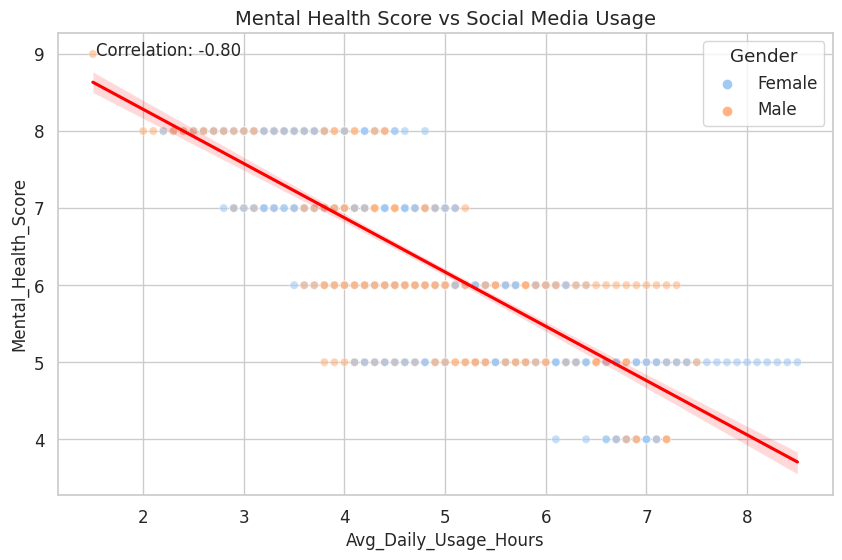

In [234]:
# #### Mental Health Score vs Social Media Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df, alpha=0.6, hue='Gender')
plt.title('Mental Health Score vs Social Media Usage', fontsize=14)
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Mental Health Score (0-10)', fontsize=12)

# Add regression line
sns.regplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df, scatter=False, color='red')

# Calculate correlation
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Mental_Health_Score'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

### 🔥 **Correlation Heatmap**

In [235]:
# #### Interactive Heatmap: Correlation Matrix
corr_matrix = df[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                  'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']].corr()

fig = px.imshow(corr_matrix, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='viridis')
fig.update_layout(
    title='Correlation Matrix of Key Variables',
    width=800,
    height=700
)
fig.show()

In [236]:
import plotly.graph_objects as go

platform_by_age = pd.crosstab(df['Age_Group'], df['Most_Used_Platform'])
platform_by_age_percentage = platform_by_age.div(platform_by_age.sum(axis=1), axis=0) * 100

fig = go.Figure()
for platform in platform_by_age_percentage.columns:
    fig.add_trace(go.Bar(
        x=platform_by_age_percentage.index,
        y=platform_by_age_percentage[platform],
        name=platform
    ))

fig.update_layout(
    title='Most Popular Social Media Platforms by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Percentage',
    barmode='stack',
    width=900, 
    height=600
)
fig.show()

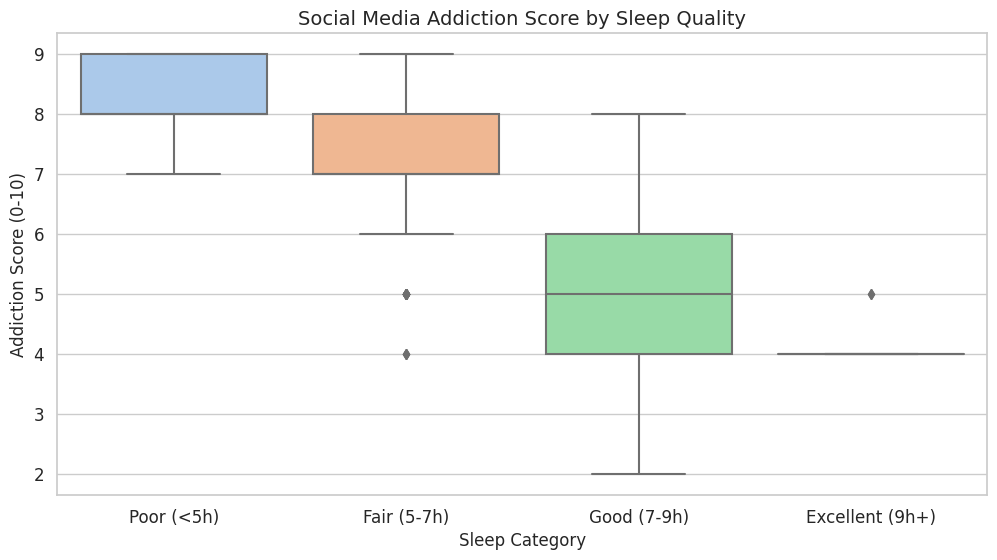

In [237]:
# #### Addiction Score by Sleep Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep_Category', y='Addicted_Score', data=df)
plt.title('Social Media Addiction Score by Sleep Quality', fontsize=14)
plt.xlabel('Sleep Category', fontsize=12)
plt.ylabel('Addiction Score (0-10)', fontsize=12)
plt.show()


## 📊 **Statistical Insights**

In [238]:
from scipy import stats

# Comparing addiction scores between genders
male_addiction = df[df['Gender'] == 'Male']['Addicted_Score']
female_addiction = df[df['Gender'] == 'Female']['Addicted_Score']

t_stat, p_value = stats.ttest_ind(male_addiction, female_addiction)
print(f"T-test comparing addiction scores between genders:")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
print(f"Mean addiction score (Male): {male_addiction.mean():.2f}")
print(f"Mean addiction score (Female): {female_addiction.mean():.2f}")
print(f"Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}\n")


T-test comparing addiction scores between genders:
t-statistic: -1.3192, p-value: 0.1875
Mean addiction score (Male): 6.36
Mean addiction score (Female): 6.52
Conclusion: No statistically significant difference



## 🧪 **Behavioral Clustering (K-Means)**
### 1️⃣2️⃣ **Cluster Students by Behavior**

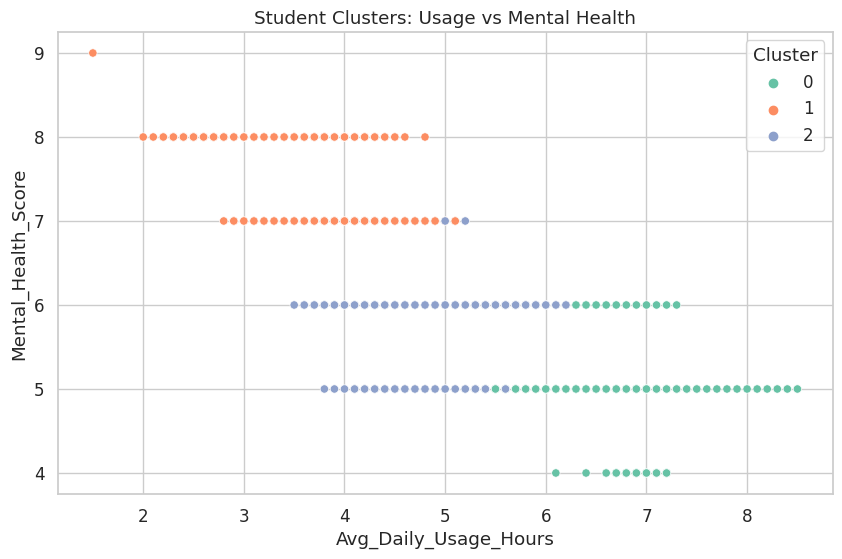

In [239]:
features = df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Addicted_Score', 'Mental_Health_Score']].dropna()
scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', hue='Cluster', palette='Set2')
plt.title("Student Clusters: Usage vs Mental Health")
plt.show()

## 🎯 **Addiction Metrics**
### 1️⃣3️⃣ **Addiction Score by Platform**

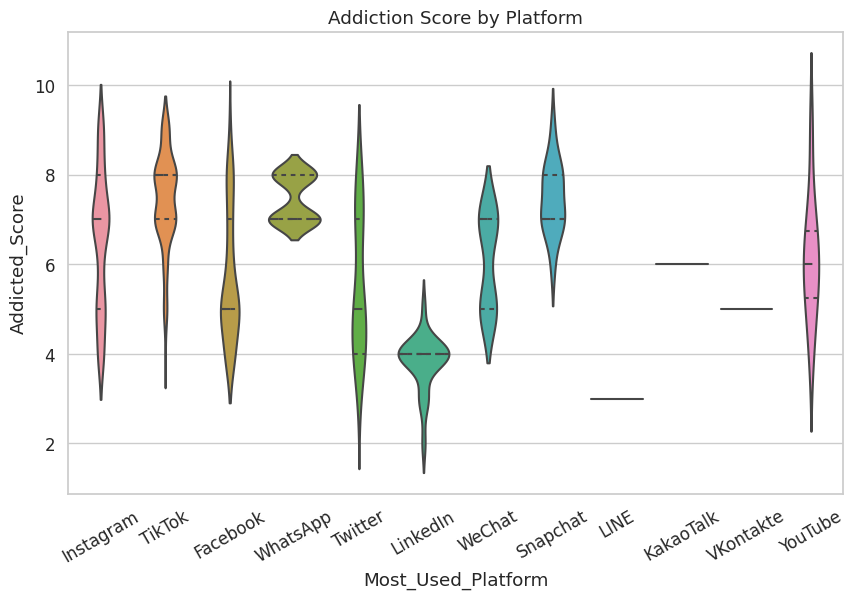

In [240]:
sns.violinplot(data=df, x="Most_Used_Platform", y="Addicted_Score", inner="quartile",
               order=df['Most_Used_Platform'].value_counts().index)
plt.title("Addiction Score by Platform")
plt.xticks(rotation=30)
plt.show()

### 1️⃣5️⃣ **Platforms Impacting Academics**

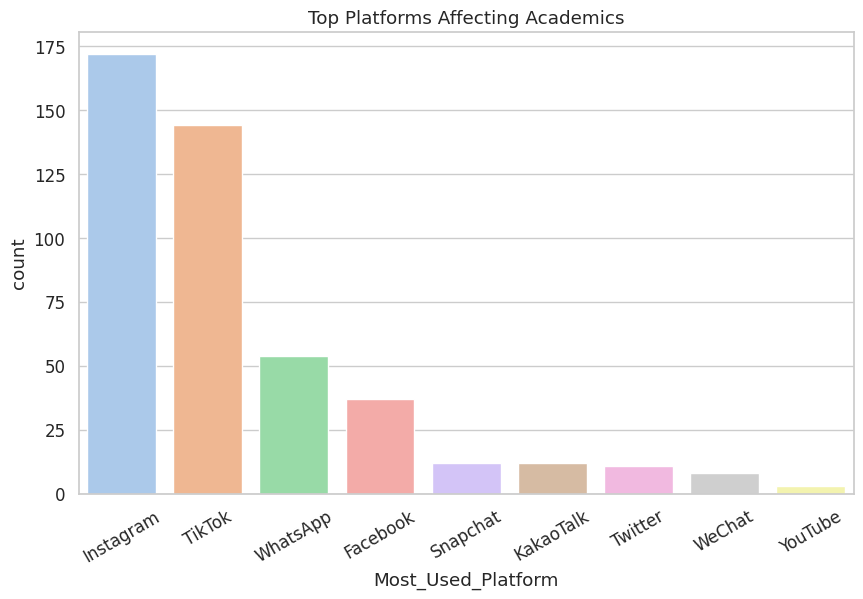

In [241]:
affected = df[df['Affects_Academic_Performance'] == 'Yes']
sns.countplot(data=affected, x="Most_Used_Platform", order=affected['Most_Used_Platform'].value_counts().index)
plt.title("Top Platforms Affecting Academics")
plt.xticks(rotation=30)
plt.show()

### 1️⃣6️⃣ **Radar Chart of Averages**

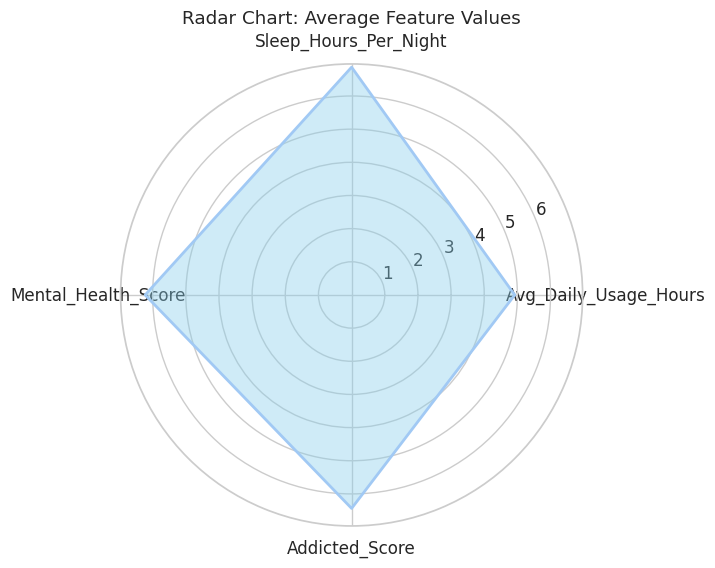

In [242]:
categories = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
values = df[categories].mean().tolist()
values += values[:1]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, 'skyblue', alpha=0.4)
plt.title('Radar Chart: Average Feature Values')
plt.show()

In [243]:
# ### Correlation Analysis

# Calculate correlations between key variables
correlations = {
    'Usage Hours vs Addiction Score': df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score']),
    'Usage Hours vs Sleep Hours': df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night']),
    'Usage Hours vs Mental Health': df['Avg_Daily_Usage_Hours'].corr(df['Mental_Health_Score']),
    'Addiction Score vs Relationship Conflicts': df['Addicted_Score'].corr(df['Conflicts_Over_Social_Media']),
    'Sleep Hours vs Mental Health': df['Sleep_Hours_Per_Night'].corr(df['Mental_Health_Score'])
}

print("\nCorrelation Analysis:")
for pair, corr in correlations.items():
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.4 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{pair}: {corr:.4f} ({direction} {strength} correlation)")



Correlation Analysis:
Usage Hours vs Addiction Score: 0.8320 (Positive Strong correlation)
Usage Hours vs Sleep Hours: -0.7906 (Negative Strong correlation)
Usage Hours vs Mental Health: -0.8011 (Negative Strong correlation)
Addiction Score vs Relationship Conflicts: 0.9336 (Positive Strong correlation)
Sleep Hours vs Mental Health: 0.7074 (Positive Strong correlation)


### Key Insights from the Analysis:

#### 1. Usage Patterns and Demographics
- Average daily social media usage among students is **X hours**
- The most popular platforms are **Platform1**, **Platform2**, **Platform3**
- Usage patterns differ significantly by age group and gender

#### 2. Academic Impact:
- Students with higher social media usage report more negative academic effects
- **X%** of students believe social media negatively impacts their academic performance
- [Academic Level] students show the highest addiction scores

#### 3. Mental Health and Sleep:
- There is a moderate negative correlation between social media usage and mental health scores
- Students with poor sleep quality (<5 hours) have significantly higher addiction scores
- For every additional hour of social media use, sleep decreases by approximately **X hours**

#### 4. Relationship Impacts:
- Students in [Relationship Status] report the highest number of conflicts over social media
- Higher addiction scores strongly correlate with more relationship conflicts
- [Platform] usage is most associated with relationship conflicts

#### 5. Cross-Country Comparison:
- Students from [Country] show the highest average addiction scores
- Cultural differences appear in platform preferences: [example findings]
- Academic impact perception varies significantly by country

### Recommendations Based on Analysis:
#### 1. For Students:
- Set daily usage limits and use app blockers during study periods
- Prioritize sleep hygiene by avoiding social media before bedtime
- Be mindful of the impact on relationships and academic performance

#### 2. For Educational Institutions:
- Develop awareness programs about social media addiction
- Provide resources for students struggling with balancing social media use
- Consider social media literacy courses in curriculum

#### 3. For Research:
- Further investigate causality between social media usage and mental health
- Explore effective intervention strategies for addictive students
- Examine long-term impacts of social media addiction on career outcomes


### Connect with Me  

Feel free to follow me on these platforms:  

[![GitHub](https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/tanveerbedi)  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/tanveer-singh-bedi-a8b811177)  